In [2]:
import numpy as np
import pandas as pd 
import sklearn
import os

# fetching data from the device, display a sample of it and some basic informations about the set

In [3]:
def fetch_data():
    path = os.path.join('C:/Users/ibrah/Downloads','Clean_Dataset.csv')
    return pd.read_csv(path)
data = fetch_data()
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [6]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [7]:
# data['class'].value_counts()
# data['departure_time'].value_counts()
data['flight'].value_counts()


flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

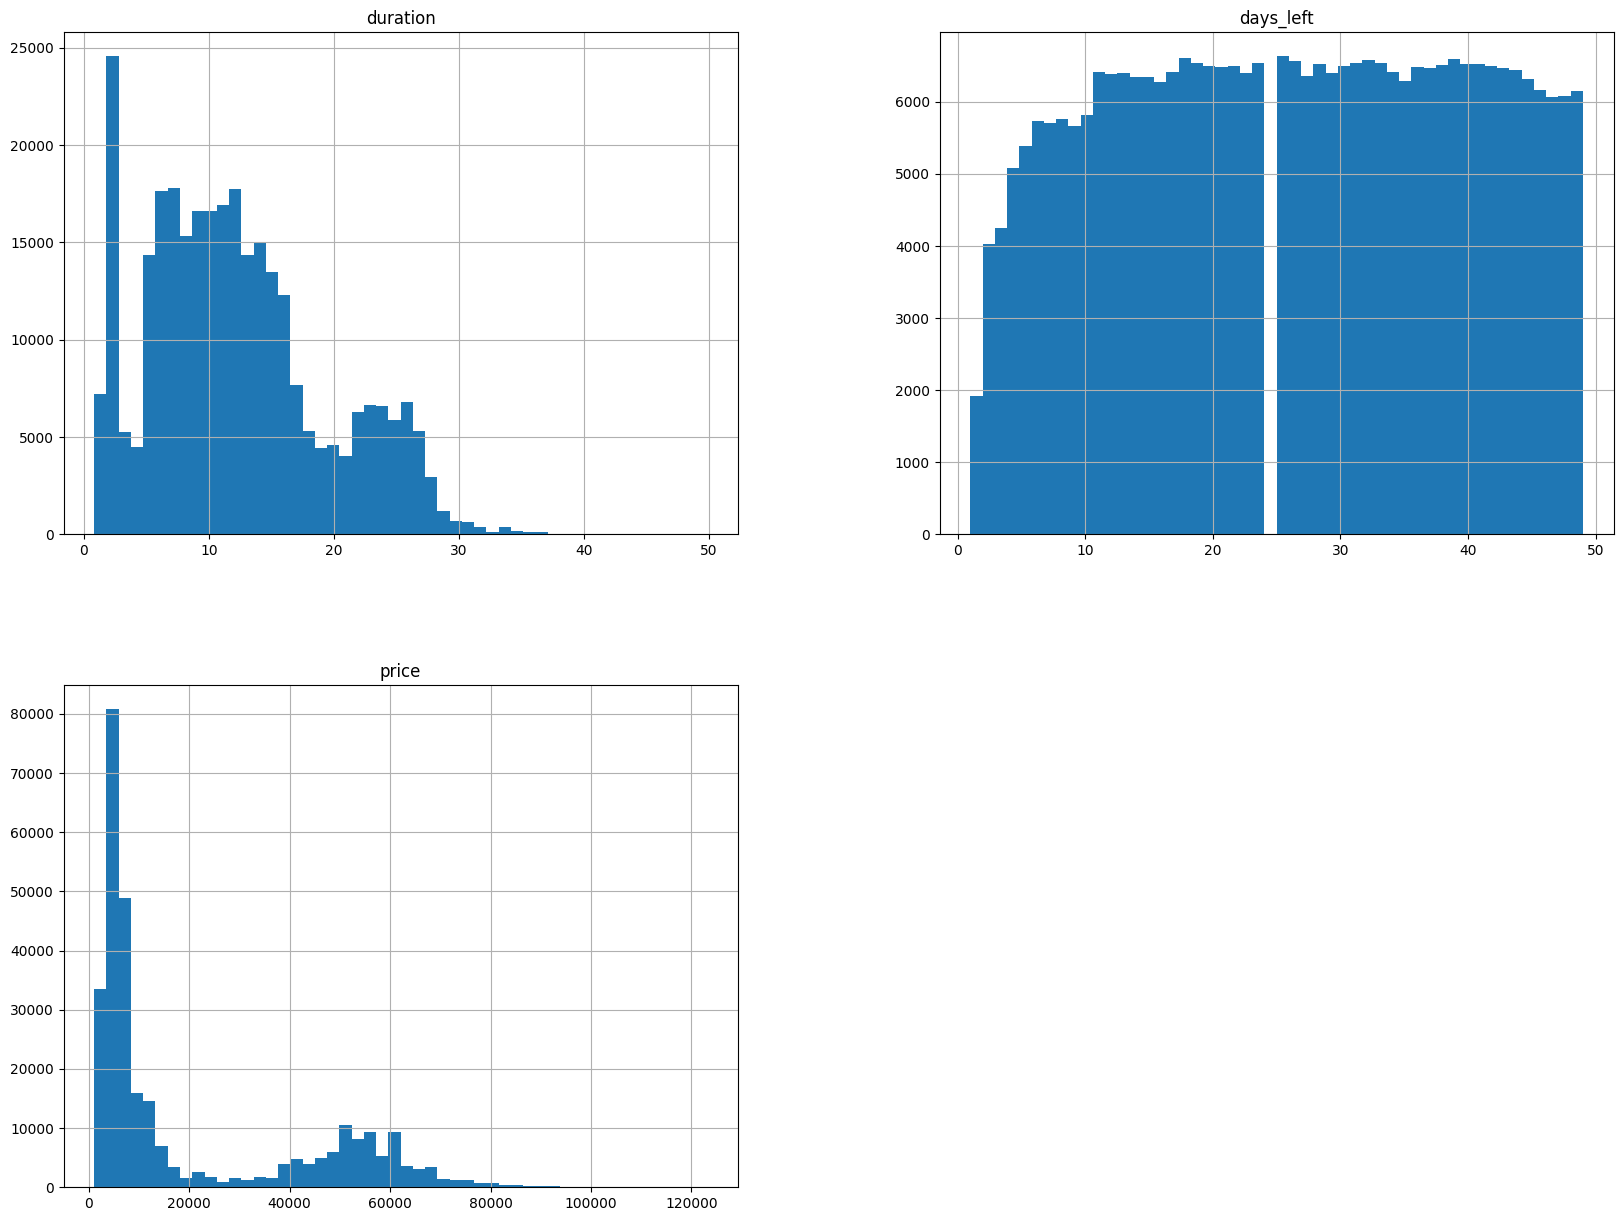

In [8]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()


<Axes: >

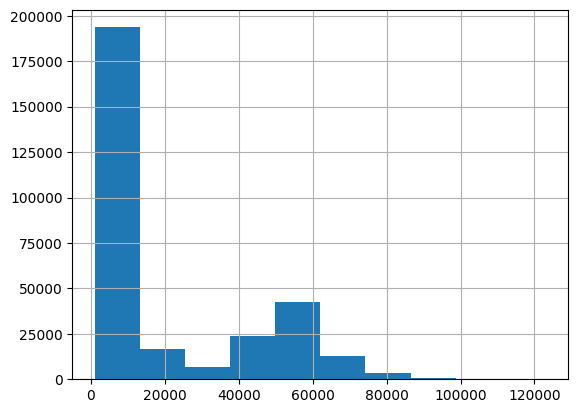

In [9]:
data['price'].hist()

# spliting dataset into train and test sets

In [10]:
# from sklearn.model_selection import train_test_split
# train_set, test_set= train_test_split(data, test_size=0.2)

In [11]:
data['price_cat'] = pd.cut(data['price'], bins=(0.,20000.,40000.,60000.,np.inf), labels=('low','middle','high_middel','high'))
data['price_cat'].value_counts()

price_cat
low            205349
high_middel     53224
high            25895
middle          15685
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(data,data['price_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [13]:
# to verify that the stratification is done correctly
strat_train_set['price_cat'].value_counts() / len(strat_train_set)

price_cat
low            0.684148
high_middel    0.177322
high           0.086273
middle         0.052257
Name: count, dtype: float64

In [14]:
data['price_cat'].value_counts() / len(data)

price_cat
low            0.684148
high_middel    0.177323
high           0.086273
middle         0.052257
Name: count, dtype: float64

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('price_cat', axis=1, inplace= True)

In [16]:
numeric_strat_train_set = strat_train_set.select_dtypes(include=['number'])
numeric_strat_train_set.head()

,duration,days_left,price
49051,2.08,32,2339
244892,27.50,2,64249
91739,7.17,39,3466
276801,17.00,41,47586
59323,15.17,37,7135


In [17]:
correlation_matrix = numeric_strat_train_set.corr()
correlation_matrix['price'].sort_values(ascending=False)

price        1.000000
duration     0.204631
days_left   -0.091205
Name: price, dtype: float64

In [18]:
training = strat_train_set.drop('price',axis=1)
training_labels= strat_train_set['price']
training_labels

49051      2339
244892    64249
91739      3466
276801    47586
59323      7135
          ...  
185541     3275
31218      4940
150256     7284
118037     4687
147392     2436
Name: price, Length: 240122, dtype: int64

In [19]:
training.shape

(240122, 10)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std', StandardScaler()),
])

num_columns = ['duration','days_left']
text_columns = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('text', OneHotEncoder(), text_columns)
])

preprocessed_training = full_pipeline.fit_transform(training)
preprocessed_training.shape

(240122, 37)

In [21]:
training_labels_array = np.array(training_labels)

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree = DecisionTreeRegressor()
tree.fit(preprocessed_training, training_labels)


DecisionTreeRegressor()

In [23]:
tree_predictions= tree.predict(preprocessed_training)
tree_mse = mean_squared_error(training_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

603.5176652247048

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(preprocessed_training, training_labels)


In [ ]:
grid_search.best_params_

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"]

X_test_prepared = full_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse